**IMPORT CSV**

In [532]:
import geopandas as gpd
import pandas as pd

In [533]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_month/allvar_ispa_5yo.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [534]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  300 non-null    int64         
 1   Unnamed: 0    300 non-null    int64         
 2   KABKOT        300 non-null    object        
 3   month         300 non-null    int64         
 4   year          300 non-null    int64         
 5   longitude     300 non-null    float64       
 6   latitude      300 non-null    float64       
 7   pm2p5         300 non-null    float64       
 8   time          300 non-null    datetime64[ns]
 9   RH            300 non-null    float64       
 10  t2m           300 non-null    float64       
 11  tp            300 non-null    float64       
 12  ispa          300 non-null    int64         
 13  pm10          300 non-null    float64       
 14  so2           300 non-null    float64       
 15  ispa_balita   300 non-null    int64     

In [535]:
df_csv['month'] = df_csv['time'].dt.month

In [536]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [537]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

In [538]:
gdf_shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVNO    6 non-null      object  
 1   KABKOTNO  6 non-null      object  
 2   PROVINSI  6 non-null      object  
 3   KABKOT    6 non-null      object  
 4   geometry  6 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 372.0+ bytes


**CREATE GEOMETRY FROM SHP AND CSV**

In [539]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

<Axes: >

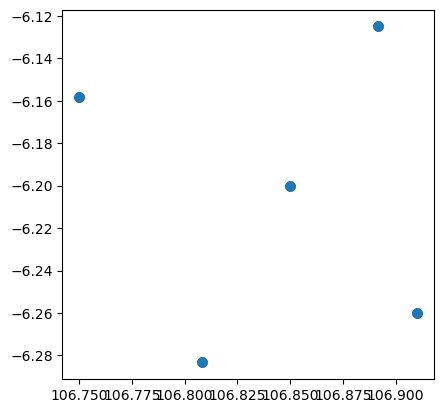

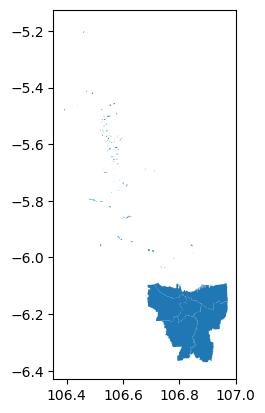

In [380]:
gdf_csv.plot()
gdf_shapefile.plot()

In [540]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='left', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'ispa_5y', 'KABKOT_left', 'geometry', 'time']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   longitude    300 non-null    float64       
 1   latitude     300 non-null    float64       
 2   month        300 non-null    int32         
 3   year         300 non-null    int32         
 4   ispa_5y      300 non-null    int64         
 5   KABKOT_left  300 non-null    object        
 6   geometry     300 non-null    geometry      
 7   time         300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(1), object(1)
memory usage: 18.8+ KB


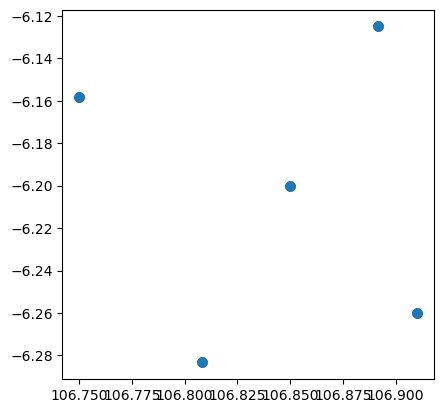

In [541]:
result_pop.plot()
result_pop.info()

**SHOW THE COLUMNS**

In [542]:
#input the columns to get the pm10 average/month
dissolved_result = result_pop.dissolve(by=['KABKOT_left','year','month', ])

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,KABKOT_left,year,month,geometry,longitude,latitude,ispa_5y,time
0,JAKARTA BARAT,2018,1,POINT (106.75000 -6.15833),106.75,-6.158333,21514,2018-01-01
1,JAKARTA BARAT,2018,2,POINT (106.75000 -6.15833),106.75,-6.158333,23476,2018-02-01
2,JAKARTA BARAT,2018,3,POINT (106.75000 -6.15833),106.75,-6.158333,27114,2018-03-01
3,JAKARTA BARAT,2018,4,POINT (106.75000 -6.15833),106.75,-6.158333,22222,2018-04-01
4,JAKARTA BARAT,2018,5,POINT (106.75000 -6.15833),106.75,-6.158333,22691,2018-05-01


**SET FOR MAPPING**

In [543]:
# ubah per month
import pandas as pd

In [544]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
#bdissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [545]:
dissolved_result_df = dissolved_result_df.sort_values(by=['KABKOT_left', 'year','month'])

In [547]:
dissolved_result_df = dissolved_result_df.groupby(['KABKOT_left','month'], as_index=False)['ispa_5y'].sum()
dissolved_result_df

,KABKOT_left,month,ispa_5y
0,JAKARTA BARAT,1,90839
1,JAKARTA BARAT,2,108249
2,JAKARTA BARAT,3,100122
3,JAKARTA BARAT,4,68004
4,JAKARTA BARAT,5,59732
5,JAKARTA BARAT,6,53995
6,JAKARTA BARAT,7,66370
7,JAKARTA BARAT,8,73540
8,JAKARTA BARAT,9,70522
9,JAKARTA BARAT,10,77470


In [484]:
# dissolved_result_df.to_csv('new map for ispa.csv')

In [454]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result_df, how='inner',predicate ='intersects')
print(polygon_result.columns)

ValueError: 'right_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

In [424]:
polygon_result = polygon_result.sort_values(by=['KABKOT_left'])

In [425]:
polygon_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index_left   240 non-null    float64       
 1   PROVNO       240 non-null    object        
 2   KABKOTNO     240 non-null    object        
 3   PROVINSI     240 non-null    object        
 4   KABKOT       240 non-null    object        
 5   KABKOT_left  300 non-null    object        
 6   year         300 non-null    int32         
 7   month        300 non-null    int32         
 8   geometry     300 non-null    geometry      
 9   longitude    300 non-null    float64       
 10  latitude     300 non-null    float64       
 11  ispa_5y      300 non-null    int64         
 12  time         300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), int64(1), object(5)
memory usage: 30.5+ KB


Line Chart All Cities

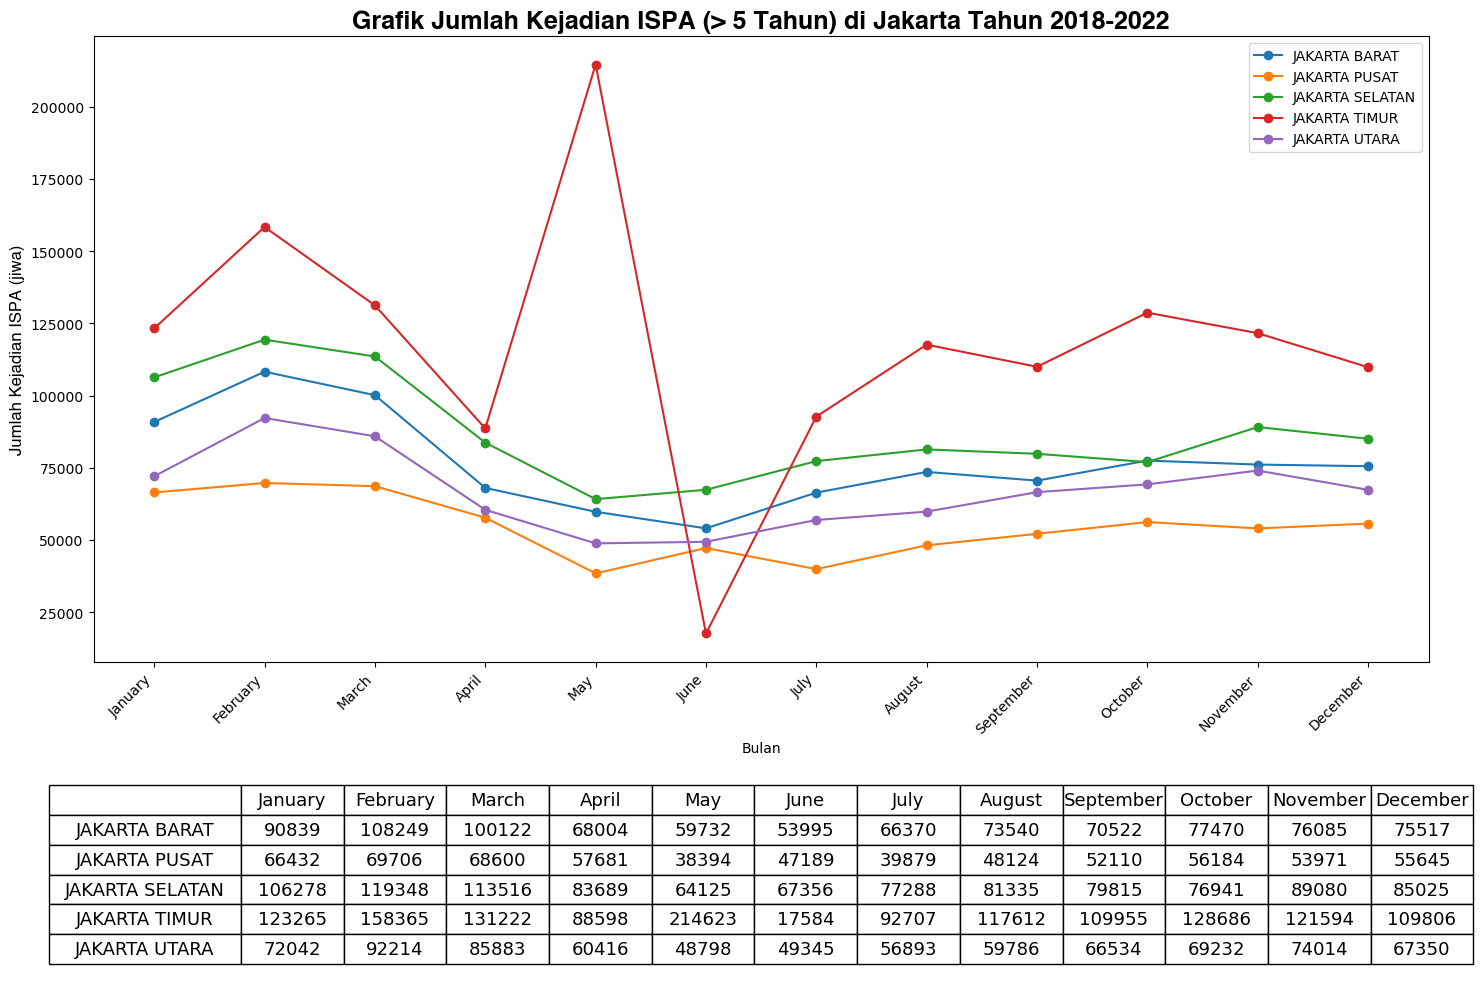

In [406]:
import matplotlib.pyplot as plt
import calendar
from matplotlib.gridspec import GridSpec

# Create a figure and axis with reduced size
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])
cities = list(dissolved_result_df['KABKOT_left'].unique())

# Plot
ax = fig.add_subplot(gs[0])
for city in cities:
    data_city = dissolved_result_df[dissolved_result_df['KABKOT_left'] == city]
    monthly_averages = []
    for month in range(1, 13):
        avg_pm25_monthly = data_city[data_city['month'] == month]['ispa_5y'].sum()
        monthly_averages.append(avg_pm25_monthly)
    ax.plot(range(1, 13), monthly_averages, marker='o', label=city)
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)], rotation=45, ha='right')
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Kejadian ISPA (jiwa)', font='Helvetica', fontsize=12)
ax.set_title('Grafik Jumlah Kejadian ISPA (> 5 Tahun) di Jakarta Tahun 2018-2022', font='Helvetica',weight='bold', fontsize=18)
ax.legend()

# Table
ax_table = fig.add_subplot(gs[1])
table_data = []
for city in cities:
    row = [city]
    for month in range(1, 13):
        avg_pm25_monthly = dissolved_result_df[(dissolved_result_df['KABKOT_left'] == city) & (dissolved_result_df['month'] == month)]['ispa_5y'].sum()
        row.append(f"{avg_pm25_monthly}") #:.2f
    table_data.append(row)

table = ax_table.table(cellText=table_data, colLabels=[' '] + [calendar.month_name[i] for i in range(1, 13)], loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
font_size = 12
font='Helvetica'
table.scale(1, font_size/8)
table.auto_set_column_width(0)

# Remove axes and set frame invisible
ax_table.axis('off')
table.auto_set_column_width(0)

plt.tight_layout()
plt.show()

Peta Polutan dan Iklim

In [334]:
import calendar
import matplotlib.pyplot as plt

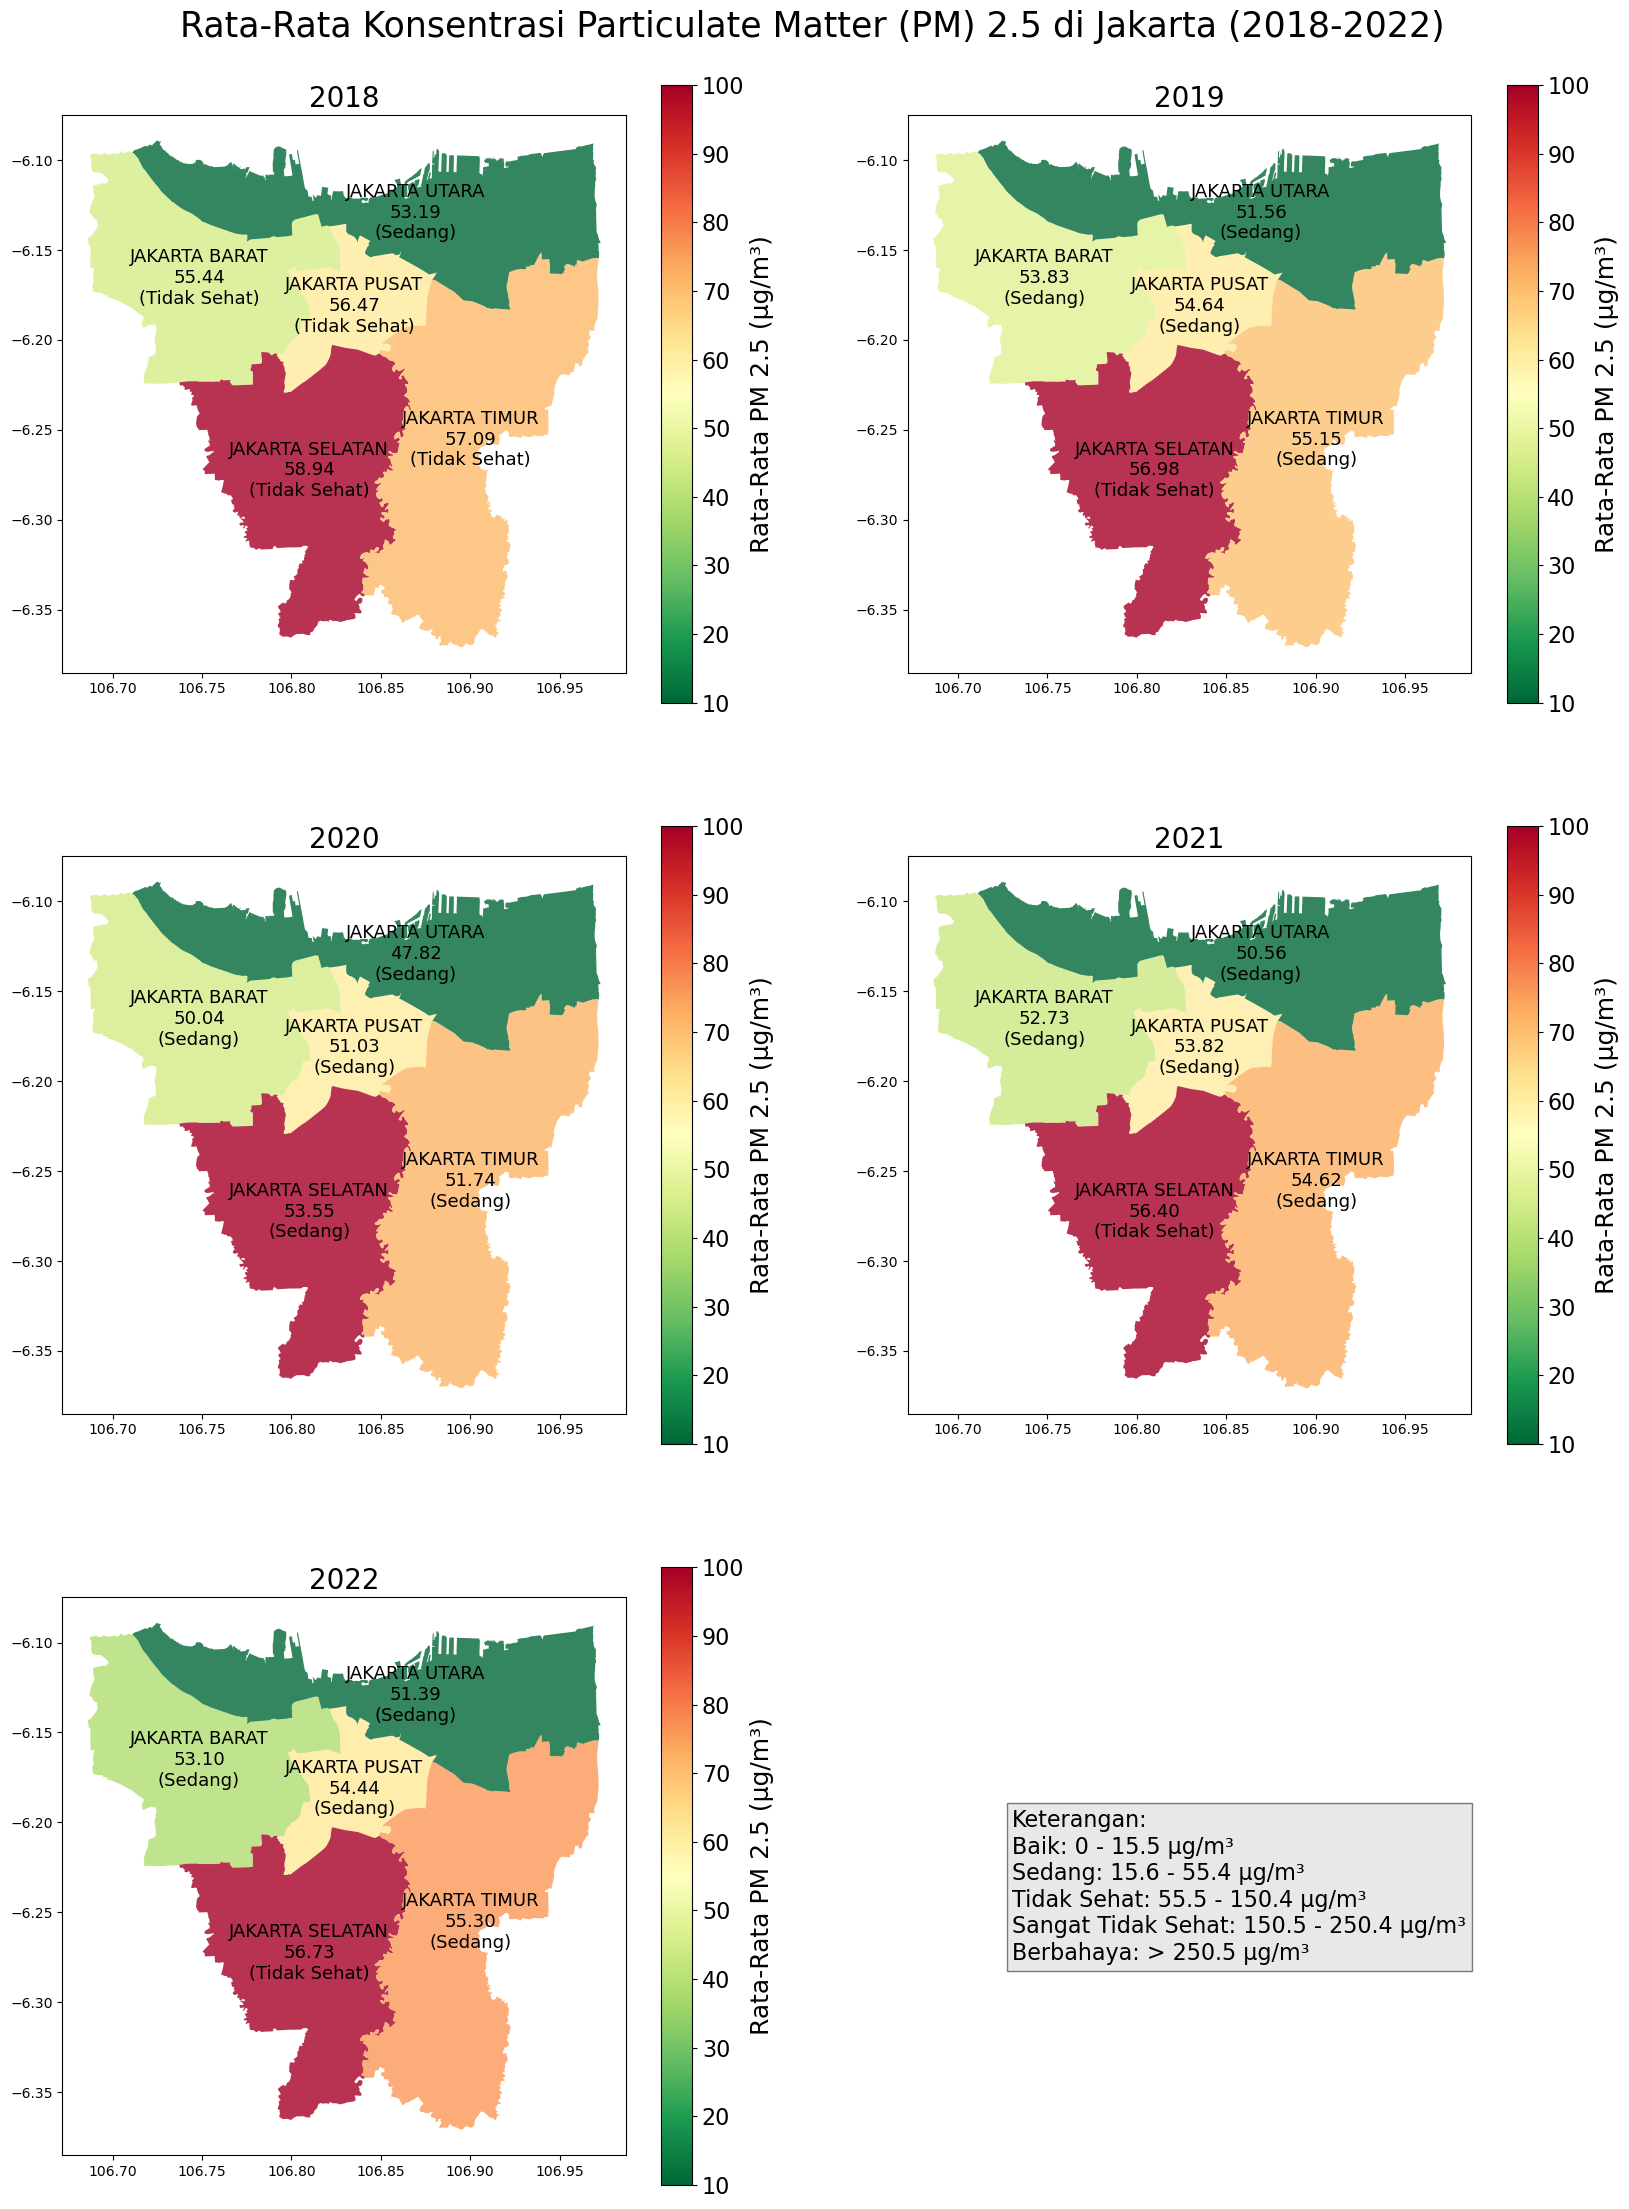

In [89]:
import calendar

# Function to determine the category based on PM2.5 value
def kategoriPSU(nilai):
    if nilai <= 15.5:
        return "Baik"
    elif nilai <= 55.4:
        return "Sedang"
    elif nilai <= 150.4:
        return "Tidak Sehat"
    elif nilai <= 250.4:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

# Create a figure with subplots for each year
fig, axs = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle('Rata-Rata Konsentrasi Particulate Matter (PM) 2.5 di Jakarta (2018-2022)', fontsize=25)

# Iterate through each year and plot the data
for year, ax in zip(range(2018, 2023), axs.flatten()):
    # Filter data for the current year
    data_yearly = polygon_result[polygon_result['year'] == year]
    
    # Plot the map for the current year with custom color range
    data_yearly.plot(ax=ax, column="pm2p5", cmap="RdYlGn_r", 
                     linewidth=0.8, alpha=0.8)

    # Annotate each polygon with average PM25 value and PSU category
    for idx, row in data_yearly.iterrows():
        nilai_pm25 = row['pm2p5']
        category = kategoriPSU(nilai_pm25)
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y,
                f"{row['KABKOT_left']}\n{nilai_pm25:.2f}\n({category})", 
                fontsize=13, ha='center', va='center')

    ax.set_title(year, fontsize=20)  # Using the calendar module to get the month name

    # Set colorbar limits
    vmin = 10
    vmax = 100

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, label="Rata-Rata PM 2.5 (µg/m³)")
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label("Rata-Rata PM 2.5 (µg/m³)", fontsize=18)

# Remove unused subplots
for ax in axs.flatten()[len(range(2018, 2023)):]:
    ax.remove()

# Add a description to the right below the subplot on the third row
overall_description = f"Keterangan:\nBaik: 0 - 15.5 µg/m³\nSedang: 15.6 - 55.4 µg/m³\nTidak Sehat: 55.5 - 150.4 µg/m³\nSangat Tidak Sehat: 150.5 - 250.4 µg/m³\nBerbahaya: > 250.5 µg/m³"
fig.text(0.60, 0.20, overall_description, ha='left', fontsize=16, bbox=dict(facecolor='lightgrey', alpha=0.5))

# Adjust layout
plt.subplots_adjust(hspace=0.2, top=0.95)  # Decrease the top parameter to reduce the space between title and subplots

# Show the plot
plt.show()

<Axes: >

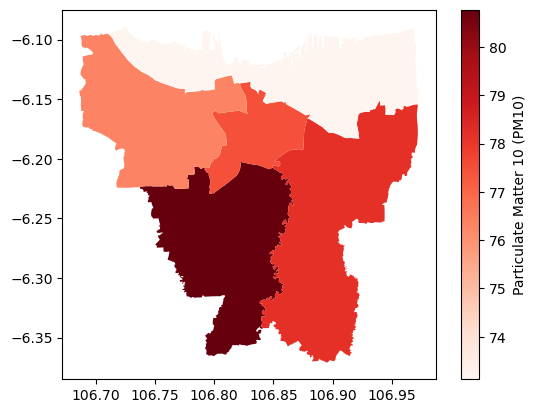

In [ ]:
a = polygon_result[polygon_result['year'] == 2019]
a.plot(column="pm10", legend=True, cmap= 'Reds',legend_kwds={"label": "Particulate Matter 10 (PM10)"})

Peta ISPA

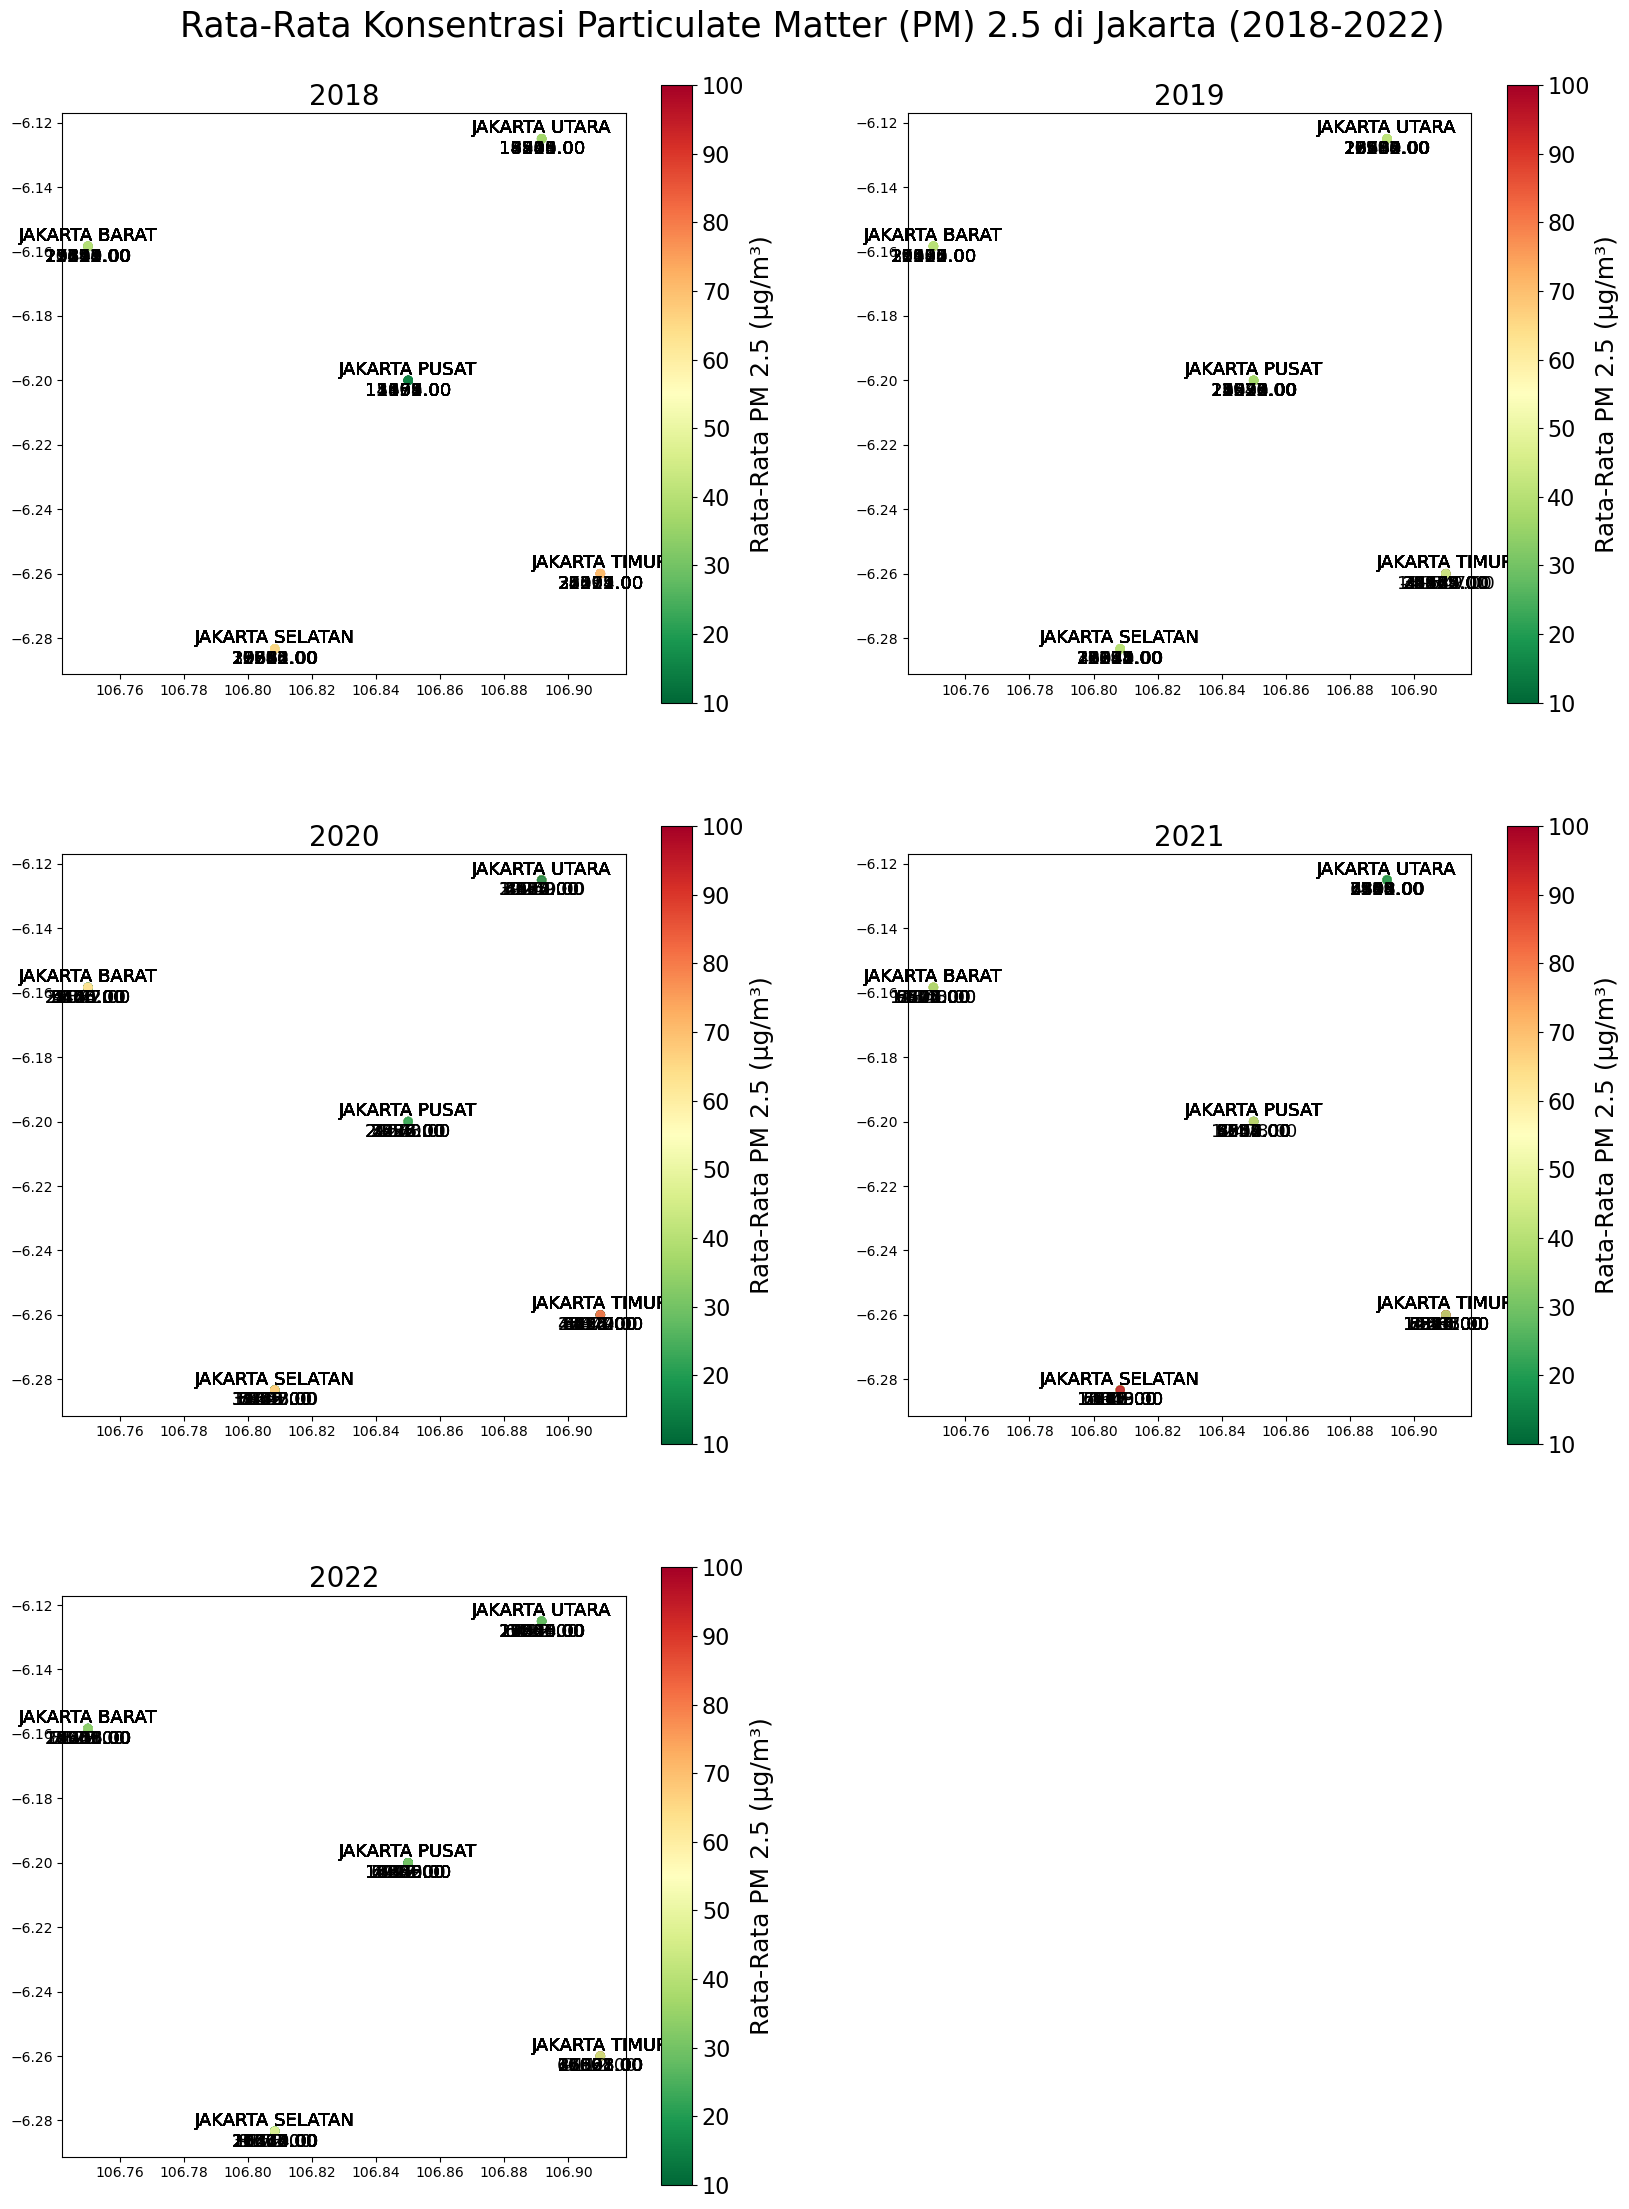

In [426]:
import calendar

# Create a figure with subplots for each year
fig, axs = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle('Rata-Rata Konsentrasi Particulate Matter (PM) 2.5 di Jakarta (2018-2022)', fontsize=25)

# Iterate through each year and plot the data
for year, ax in zip(range(2018, 2023), axs.flatten()):
    # Filter data for the current year
    data_yearly = polygon_result[polygon_result['year'] == year]
    
    # Plot the map for the current year with custom color range
    data_yearly.plot(ax=ax, column="ispa_5y", cmap="RdYlGn_r", 
                     linewidth=0.8, alpha=0.8)

    # Annotate each polygon with average PM25 value and PSU category
    for idx, row in data_yearly.iterrows():
        nilai_pm25 = row['ispa_5y']
        category = kategoriPSU(nilai_pm25)
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y,
                f"{row['KABKOT_left']}\n{nilai_pm25:.2f}", 
                fontsize=13, ha='center', va='center')

    ax.set_title(year, fontsize=20)  # Using the calendar module to get the month name

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, label="Rata-Rata PM 2.5 (µg/m³)")
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label("Rata-Rata PM 2.5 (µg/m³)", fontsize=18)

# Remove unused subplots
for ax in axs.flatten()[len(range(2018, 2023)):]:
    ax.remove()

# Adjust layout
plt.subplots_adjust(hspace=0.2, top=0.95)  # Decrease the top parameter to reduce the space between title and subplots

# Show the plot
plt.show()